# Documentation

In [1]:
import logging
import graphviz
logging.basicConfig(format='[%(levelname)s@%(name)s] %(message)s', level=logging.DEBUG)
graphviz.__version__, graphviz.version()

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-V']


('0.20.1', (2, 43, 0))

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


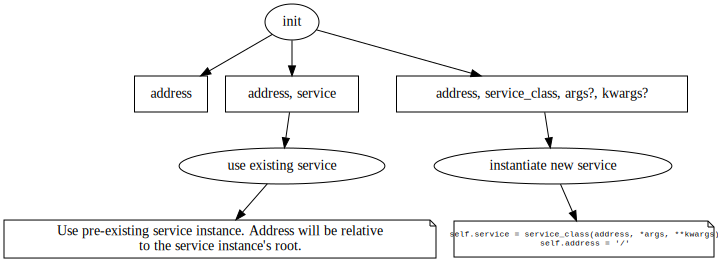

In [106]:
dini = graphviz.Source('''
digraph "Dcel init flow"
{
    rankdir=TB;
    node [shape=box];

    init [label="init", shape=oval]
    address [label="address"]
    service [label="address, service"]
    service_class [label="address, service_class, args?, kwargs?"]
    
    init -> address, service, service_class
    
    service_class -> new_service -> new_service_proc
    service -> use_service -> use_service_proc
    
    use_service [label="use existing service", shape=oval]
    use_service_proc [
    label="Use pre-existing service instance. Address will be relative
    to the service instance's root."
    shape=note
    ]
    
    new_service [label="instantiate new service",shape=oval]
    new_service_proc [
    label="self.service = service_class(address, *args, **kwargs)
    self.address = \'/\'",
    shape=note,
    fontname="Courier",
    fontsize="8pt"]
    
}
''')
dini